In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
drive_path = '/content/drive/MyDrive/general_assembly/code/capstone/arabic_characters'

In [3]:
import pickle

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.regularizers import l2

np.random.seed(42)

In [4]:
with open(drive_path + '/arabcharsrgb.pkl', 'rb') as f:
    ac_data = pickle.load(f)

In [5]:
train_imgs = ac_data[0].copy()
test_imgs = ac_data[1].copy()
train_labels = ac_data[2].copy()
test_labels = ac_data[3].copy()
X_train = ac_data[4].copy()
X_test = ac_data[5].copy()
y_train = ac_data[6].copy()
y_test = ac_data[7].copy()
class_dict = ac_data[8].copy()

## CNN Model #1
This is the model proposed in the paper outlining the data set by the people who collected the data [(source)](https://www.researchgate.net/publication/313891953_Arabic_Handwritten_Characters_Recognition_using_Convolutional_Neural_Network). The grid searching method used was originally published [here](https://machinelearningmastery.com/how-to-reduce-overfitting-in-deep-learning-with-weight-regularization/).

In [6]:
# l2 value of 1e-8
# construct network
model = Sequential()

# Convolutional and Max Pooling - layers 1 & 2
model.add(Conv2D(80, (5, 5), activation='relu', kernel_regularizer=l2(1e-8), input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))

# Convolutional and Max Pooling - layers 3 & 4
model.add(Conv2D(64, (5, 5), activation='relu', kernel_regularizer=l2(1e-8)))
model.add(MaxPooling2D((2, 2)))

# classification - layers 5 & 6
model.add(Flatten())
model.add(Dense(1024, activation='relu', kernel_regularizer=l2(1e-8)))
model.add(Dense(28, activation='softmax'))

# compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=256, epochs=30)

Epoch 1/30
53/53 [==============================] - 5s 93ms/step - loss: 1.6927 - accuracy: 0.4843 - val_loss: 0.8228 - val_accuracy: 0.7372
Epoch 2/30
53/53 [==============================] - 5s 89ms/step - loss: 0.6144 - accuracy: 0.7986 - val_loss: 0.5613 - val_accuracy: 0.8220
Epoch 3/30
53/53 [==============================] - 5s 93ms/step - loss: 0.3632 - accuracy: 0.8824 - val_loss: 0.5546 - val_accuracy: 0.8241
Epoch 4/30
53/53 [==============================] - 5s 91ms/step - loss: 0.2675 - accuracy: 0.9071 - val_loss: 0.3705 - val_accuracy: 0.8783
Epoch 5/30
53/53 [==============================] - 5s 93ms/step - loss: 0.1796 - accuracy: 0.9398 - val_loss: 0.3379 - val_accuracy: 0.8979
Epoch 6/30
53/53 [==============================] - 5s 92ms/step - loss: 0.1313 - accuracy: 0.9566 - val_loss: 0.3205 - val_accuracy: 0.9012
Epoch 7/30
53/53 [==============================] - 5s 91ms/step - loss: 0.0846 - accuracy: 0.9732 - val_loss: 0.3282 - val_accuracy: 0.9077
Epoch 8/30
53

In [8]:
def plot_training(model_history=history):
    plt.figure(figsize=(8,10))

    plt.subplot(2,1,1)
    plt.title('Model Loss', fontsize=16)
    plt.xlabel('Number of Epochs', fontsize=12)
    plt.plot(model_history.history['loss'], label='Train Loss')
    plt.plot(model_history.history['val_loss'], label='Val Loss')
    plt.legend()

    plt.subplot(2,1,2)
    plt.title('Model Accuracy', fontsize=16)
    plt.xlabel('Number of Epochs', fontsize=12)
    plt.plot(model_history.history['accuracy'], label='Train Accuracy')
    plt.plot(model_history.history['val_accuracy'], label='Val Accuracy')
    plt.legend()

    plt.subplots_adjust(hspace=0.5) 
    plt.show()

    return

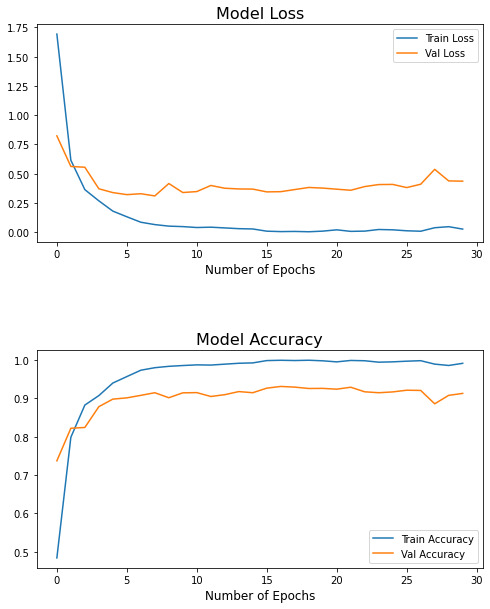

In [9]:
plot_training()

In [10]:
model.evaluate(X_test, y_test)

105/105 [==============================] - 1s 7ms/step - loss: 0.4356 - accuracy: 0.9128


[0.43561384081840515, 0.9127976298332214]

## Model Performance
Based on the information above, we're going to choose a model with $l_2 =$ `1e-8` because it had the lowest test score (0.3901, a massive improvement over the baseline's 0.8514) and close to the highest accuracy score (92.44%). Although, it seems that any of the values less than or equal to `1e-3` would work comparably well due to the variance produced within this stochastically generated method.